Using a single neighbour to classify a point isn't particularly robust to incorrect classifications or outliers.  It can also lead to sharp changes in the decision boundtry rather than the smooth decision function we're looking for.  To mitigate this we can extend the logic to instead look at a larger number of neighbours.  For example, we may look at the three nearest neighbours and choose the label which is most common.

Before we start the algorithm itself, it will be helpful to make a helper function to define plot graphs of decision space

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pow,sqrt

In [68]:
def plotDecisionBoundaries(classifer):
    '''
    Takes a classifier and creates a graph of the decision boundries using a grid of points.
    Currently only uses data between 1. and 2. in x and y
    '''
    xValues, yValues = list(np.linspace(1.0, 2.0, num=40)),list(np.linspace(1.0, 2.0, num=40))
    xv, yv = np.meshgrid(xValues, yValues)    
    points = zip(xv.ravel(), yv.ravel())
    classifications = [classifer.classify(point) for point in points]
    plt.scatter(xv.ravel(), yv.ravel(), color = classifications)

In [ ]:
def euclideanDistance(x, y):
    '''
    Takes two vectors encoded as lists and returns a float distance between them
    '''
    if len(x) != len(y): raise "Distance only defined for vectors of the same dimensionality"
    squares = [pow(x[i] - y[i],2) for i in range(len(x))]
    totalSquared = sum(squares)
    return sqrt(totalSquared)

To make sure this is working as desired, I will start by visualizing the simple nearest neighbours from the previous notebook, using both simple data and slighty more complex boundary space

In [70]:
simpleLabelledData = [
    [1,1,"red"],
    [1,2,"blue"],
    [2,1,"green"],   
    [2,2,"purple"],   
]

complexLabelledData = [
    [1,1.5,"red"],
    [1.3,1.7,"blue"],
    [2.0,1.0,"green"],   
    [1.5,1.5,"purple"],   
]

In [71]:
class NNClassifier:
    
    def __init__(self, labelledData, distanceFunction = euclideanDistance):
        self.data = labelledData
        self.distanceFunction = euclideanDistance
    
    def indexOfNearestNeighbour(self, novelPoint):
        distances = [self.distanceFunction([x[0], x[1]], novelPoint) for x in self.data]
        indexOfMin = distances.index(min(distances))
        return indexOfMin
    
    def classify(self, point):
        return self.data[self.indexOfNearestNeighbour(point)][-1]

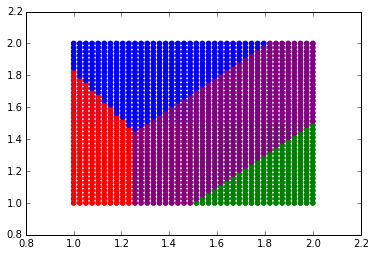

In [72]:
plotDecisionBoundaries(NNClassifier(simpleLabelledData))

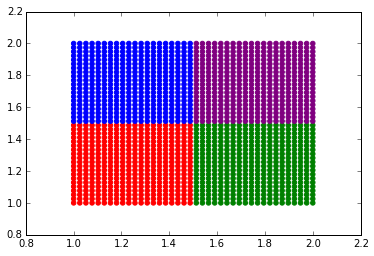

In [67]:
plotDecisionBoundaries(NNClassifier(complexLabelledData))